# Methods

The first method that will be implemented is a decision tree for classification. A decision tree is a form of supervised learning in which the machine 'learns' a series of sequential rules by which the data can be broken down. Decision trees recursivley partitions the dataset based on the features of the dataset. The result is a 'tree', where the top represents the whole dataset. From there, the features are analyzed and rules are inferrred at each level. Once a rule is inferred, a new branch is created. The branches become more granular as the algorithm traverses down the tree. Then, the tree is pruned in order to simplify the algorithm and remove nodes that to not contribute to the classifying power of the algorithm. For classification, the rules are inferred which can then be used to predict class label. These trees are a type of predictive workflow, such that a new data point can be predictively classified based on the extent to which they meet conditions at each node within the decision tree.

Decision trees can also be used for regression. The structure of the decision tree is exactly as described as above - a series of connected nodes based on inferred rules from a labeled dataset. However, instead of predicting class, the tree can be used to infer numerical values based on some input. It is similar to plugging in a speculative x value in a y=mx+b equation to predidct y. However, the input will traverse along the edges of the tree and a numerical prediction will be made at each note. The output is predicted based on the final node that the input reaches on the tree. 

Random Forests will also be used in this analysis. A random forrest is a collection of decision trees. The algorithm generates many decision trees and aggregates their outputs to generate a more robust predicition either for regression or classification tasks. The random forest is a more robust machine learning algorithm when compared to the decision tree. Decision trees are vulnerable to overfitting, a weakness that is subverted through the implementation of a random forest. However, they are more computationally expensive. Random forrests can be used for classification or regression - the former combines many decision trees for classification and the latter combines many decision trees for regression. Once the results are aggregated, some measure of center is taken to generate the output. 

This analysis aims to leverage decision trees and random forrests to develop models to predict human freedom and political regime. Human freedom is measured as the human freedom score, as is defined by the Cato Institute. Regression modeling will be used to develop predictive models for freedom based off of economic, political, educational, and safety metrics. Political regime will be binarized into democracy and autocracy for this analysis. Regime will be classified based on the same economic, pollitical, educational, safety, and freedom measures. Decision trees and random forrests will be used to build these models. Classification algorithms will be evaulated through accuracy measures and regression algorithms will be evaluated through the coefficeint of determination. These models will be build out in Python using the Scikit-learn package.

# Code Workflow

## Package Import, Data Import, and Preprocessing

In [1]:
# Package Import
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Data Import / Preprocessing
df = pd.read_csv('c:\\Users\\erinb\\OneDrive\\Documents\\Georgetown\\DSAN 5000\\dsan-5000-project-ebevec\\data\\01-modified-data\\data_clean2.csv')
df = df.replace(",", "", regex = True)
df = df.iloc[:,1:]
df.columns

#To Numeric
cols = ['GDP_2019', 'GDP_2020', 'pop_2019', 'pop_2020',
       'unemployment_2019', 'unemployment_2020', 'hf_score_2019',
       'hf_rank_2019', 'pf_religion_2019', 'pf_expression_2019',
       'ef_score_2019', 'pf_ss_2019', 'hf_score_2020', 'hf_rank_2020',
       'pf_religion_2020', 'pf_expression_2020', 'ef_score_2020', 'pf_ss_2020', 'Learning.Adjusted.Years.of.School']
df[cols] = df[cols].apply(pd.to_numeric, errors='coerce')

# Linear Interpolation
full_df = df.dropna()

# GDP
delta = df['GDP_2020'] - df['GDP_2019']
delta = delta.mean()

df['GDP_2020'] = df['GDP_2020'].fillna(df['GDP_2019'] + delta)
df['GDP_2019'] = df['GDP_2019'].fillna(df['GDP_2020'] - delta)
df.head()

# Population 
delta2 = full_df['pop_2020'] - full_df['pop_2019']
delta2 = delta2.mean()

df['pop_2020'] = df['pop_2020'].fillna(df['pop_2019'] + delta)
df['pop_2019'] = df['pop_2019'].fillna(df['pop_2020'] - delta)
df.head()

# Unemployment - Too many NaN for interpolation. Dropping columns. Imputation unreasonable for country-wise comparion.
df = df.drop(columns = ['unemployment_2019', 'unemployment_2020'])
df = df.drop(columns = ['GDP_2019', 'pop_2019' , 'hf_score_2019', 'hf_rank_2020', 'pf_religion_2019', 'pf_expression_2019', 'ef_score_2019', 'regime_2019', 'pf_ss_2019', 'Year'])
df.isna().sum()
df.head()

,Country,GDP_2020,pop_2020,hf_rank_2019,hf_score_2020,pf_religion_2020,pf_expression_2020,ef_score_2020,pf_ss_2020,Learning.Adjusted.Years.of.School,regime_2020
0,Albania,1644.08,2.878,42,7.67,9.757500,6.106867,7.64,9.249726,8.953018,electoral autocracy
1,Algeria,18476.90,43.851,155,5.13,5.417292,4.395414,5.12,8.840074,7.091553,electoral autocracy
2,Angola,33041.00,33.428,127,5.97,6.746042,5.597544,5.91,8.473782,4.234978,electoral autocracy
3,Argentina,27481.44,45.388,75,6.99,9.873750,8.389844,4.87,8.504898,8.411310,electoral democracy
4,Armenia,6181.90,2.962,34,8.14,8.389792,7.580944,7.84,9.395818,7.994621,electoral democracy


## Class Distribution

In [4]:
# Class Balance
t0 = df[df['regime_2020'] == 'closed autocracy']
t1 = df[df['regime_2020'] == 'electoral autocracy']
t2 = df[df['regime_2020'] == 'electoral democracy']
t3 = df[df['regime_2020'] == 'liberal democracy']

t0_num = len(t0)
t0_prop = len(t0) / len(df)
t1_num = len(t1)
t1_prop = len(t1) / len(df)
t2_num = len(t2)
t2_prop = len(t2) / len(df)
t3_num = len(t3)
t3_prop = len(t3) / len(df)

print('Every Class of Regime')
print('Number of points with target= closed autocracy: ', t0_num) 
print('Proportion: ', t0_prop)
print('Number of points with target= electoral autocracy: ', t1_num)
print('Proportion: ', t1_prop)
print('Number of points with target= electoral democracy: ', t2_num)
print('Proportion: ', t2_prop)
print('Number of points with target= liberal democracy: ', t3_num)
print('Proportion: ', t3_prop)

print('Democracy versus Autocracy')
print('Number of points with target= autocracy: ', t0_num+t1_num) 
print('Proportion: ', t0_prop+t1_prop)
print('Number of points with target= autocracy: ', t2_num+t3_num)
print('Proportion: ', t2_prop+t3_prop)

Every Class of Regime
Number of points with target= closed autocracy:  13
Proportion:  0.0962962962962963
Number of points with target= electoral autocracy:  44
Proportion:  0.32592592592592595
Number of points with target= electoral democracy:  46
Proportion:  0.34074074074074073
Number of points with target= liberal democracy:  32
Proportion:  0.23703703703703705
Democracy versus Autocracy
Number of points with target= autocracy:  57
Proportion:  0.4222222222222223
Number of points with target= autocracy:  78
Proportion:  0.5777777777777777


## Baseline Model

In [5]:
import numpy as np
import random
from collections import Counter
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support

def generate_label_data(class_labels, weights,N=10000):
    y=random.choices(class_labels, weights = weights, k = N)
    print("-----GENERATING DATA-----")
    print("unique entries:",Counter(y).keys())  
    print("count of labels:",Counter(y).values()) # counts the elements' frequency
    print("probability of labels:",np.fromiter(Counter(y).values(), dtype=float)/len(y)) # counts the elements' frequency
    return y

## RANDOM CLASSIFIER 
def random_classifier(y_data):
    ypred=[];
    max_label=np.max(y_data); #print(max_label)
    for i in range(0,len(y_data)):
        ypred.append(int(np.floor((max_label+1)*np.random.uniform(0,1))))

    print("-----RANDOM CLASSIFIER-----")
    print("count of prediction:",Counter(ypred).values()) # counts the elements' frequency
    print("probability of prediction:",np.fromiter(Counter(ypred).values(), dtype=float)/len(y_data)) # counts the elements' frequency
    print("accuracy",accuracy_score(y_data, ypred))
    print("percision, recall, fscore,",precision_recall_fscore_support(y_data, ypred))


# Based on true class balacne
print("\nBINARY CLASS: NON UNIFORM LOAD")
y=generate_label_data([0,1],[0.42,0.58],10000)
random_classifier(y)



BINARY CLASS: NON UNIFORM LOAD
-----GENERATING DATA-----
unique entries: dict_keys([1, 0])
count of labels: dict_values([5818, 4182])
probability of labels: [0.5818 0.4182]
-----RANDOM CLASSIFIER-----
count of prediction: dict_values([5049, 4951])
probability of prediction: [0.5049 0.4951]
accuracy 0.4987
percision, recall, fscore, (array([0.41607756, 0.57971876]), array([0.49258728, 0.50309385]), array([0.45111135, 0.53869513]), array([4182, 5818], dtype=int64))


## Decision Trees

### Classification

In [6]:
df['regime_2020'] = df['regime_2020'].replace('closed autocracy', 0)
df['regime_2020'] = df['regime_2020'].replace('electoral autocracy', 0)
df['regime_2020'] = df['regime_2020'].replace('electoral democracy', 1)
df['regime_2020'] = df['regime_2020'].replace('liberal democracy', 1)

df = df.iloc[:,1:]

(10, 10)


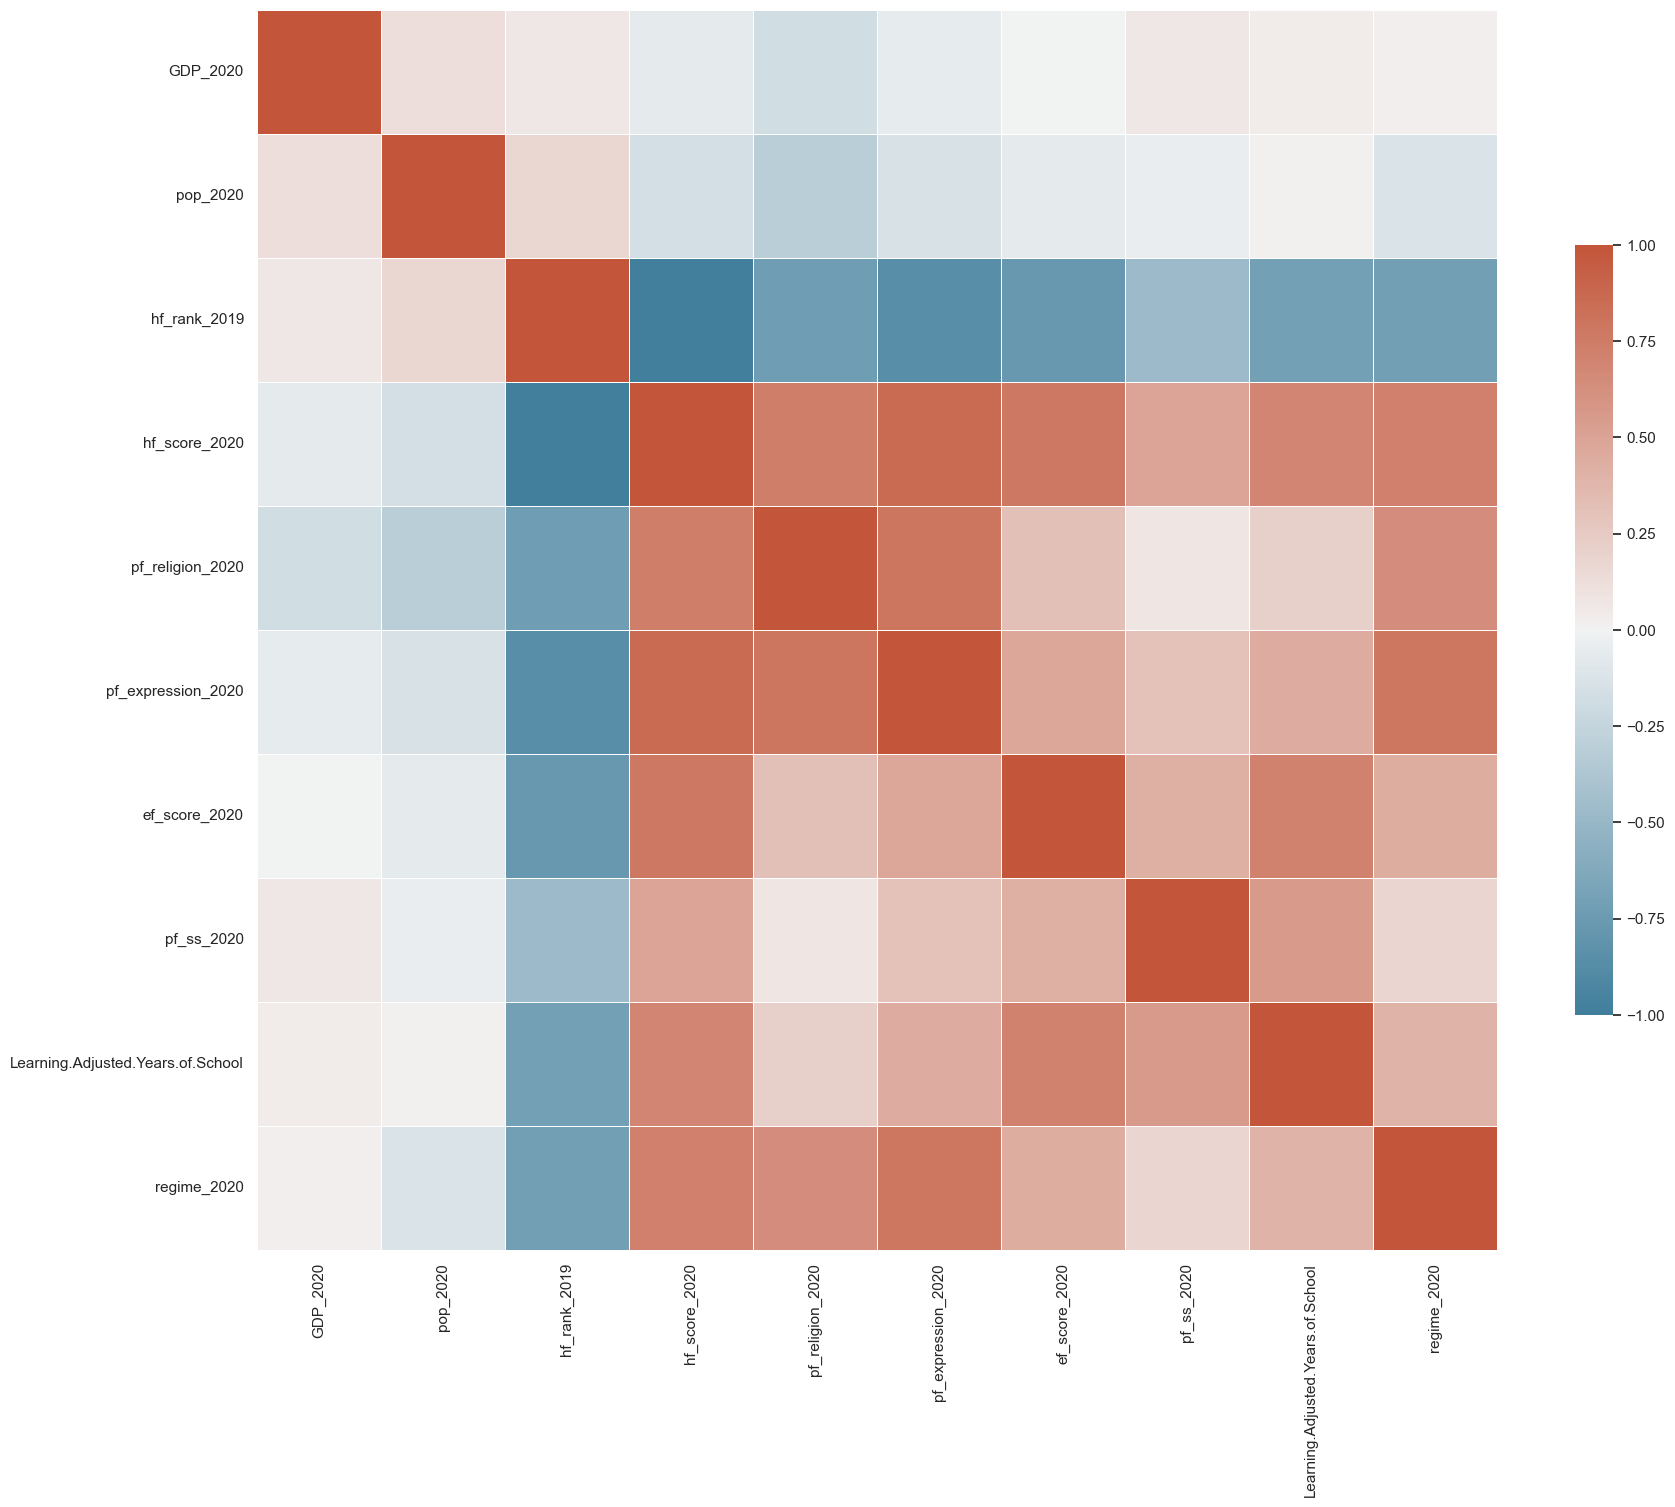

In [7]:
# Correlation Matrix

corr = df.corr();  #print(corr)					#COMPUTE CORRELATION OF FEATER MATRIX
print(corr.shape)
sns.set_theme(style="white")
f, ax = plt.subplots(figsize=(20, 20))  # Set up the matplotlib figure
cmap = sns.diverging_palette(230, 20, as_cmap=True) 	# Generate a custom diverging colormap
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr,  cmap=cmap, vmin=-1, vmax=1, center=0,
        square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show();

Train / Test Split - Classification

In [8]:
df.head()
X = df.iloc[:,:9]
Y = df['regime_2020']

from sklearn.model_selection import train_test_split

x_train, x_test = train_test_split(X, test_size=0.2, random_state=123)
y_train, y_test = train_test_split(Y, test_size=0.2, random_state=123)

Train Model

In [9]:
from sklearn import tree
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, ConfusionMatrixDisplay, recall_score
model = tree.DecisionTreeClassifier()
model = model.fit(x_train, y_train)

yp_train = model.predict(x_train)
yp_test = model.predict(x_test)

In [10]:
def confusion_plot(y_data, y_pred):
    mat = confusion_matrix(y_data, y_pred)
    accuracy = accuracy_score(y_data, y_pred)
    pos_prec = precision_score(y_data, y_pred)
    neg_prec = precision_score(y_data, y_pred, pos_label=0)
    pos_recall = precision_score(y_data, y_pred)
    neg_recall = precision_score(y_data, y_pred, pos_label=0)
    print("ACCURACY: ", accuracy)
    print("NEGATIVE RECALL (Y=0): ", neg_recall)
    print("NEGATIVE PRECISION (Y=0): ", neg_prec)
    print("POSITIVE RECALL (Y=1): ", pos_recall)
    print("POSITIVE PRECISION (Y=1): " , pos_prec) 
    print(mat)
    disp = ConfusionMatrixDisplay(mat)
    disp.plot()
    plt.show()

------TRAINING------
ACCURACY:  1.0
NEGATIVE RECALL (Y=0):  1.0
NEGATIVE PRECISION (Y=0):  1.0
POSITIVE RECALL (Y=1):  1.0
POSITIVE PRECISION (Y=1):  1.0
[[47  0]
 [ 0 61]]


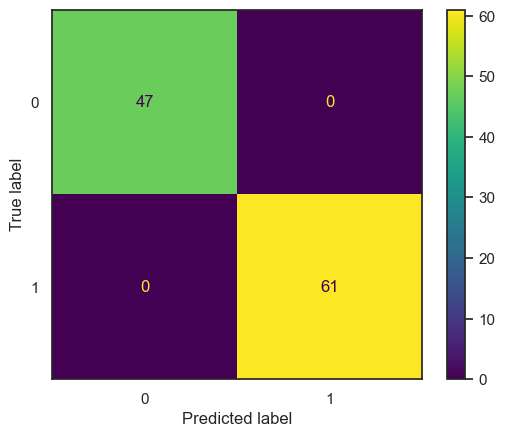

------TEST------
ACCURACY:  0.8518518518518519
NEGATIVE RECALL (Y=0):  0.875
NEGATIVE PRECISION (Y=0):  0.875
POSITIVE RECALL (Y=1):  0.8421052631578947
POSITIVE PRECISION (Y=1):  0.8421052631578947
[[ 7  3]
 [ 1 16]]


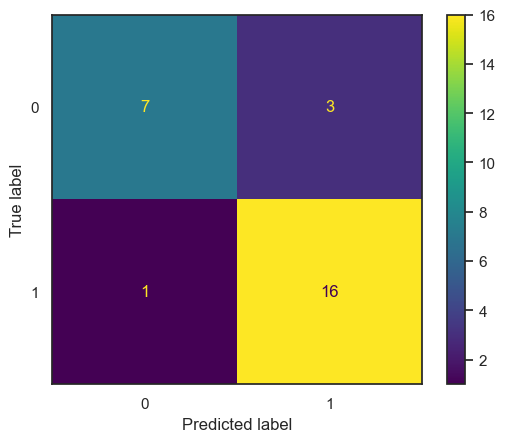

In [11]:
 
print("------TRAINING------")
confusion_plot(y_train,yp_train)
print("------TEST------")
confusion_plot(y_test,yp_test)

Tree Vizualization

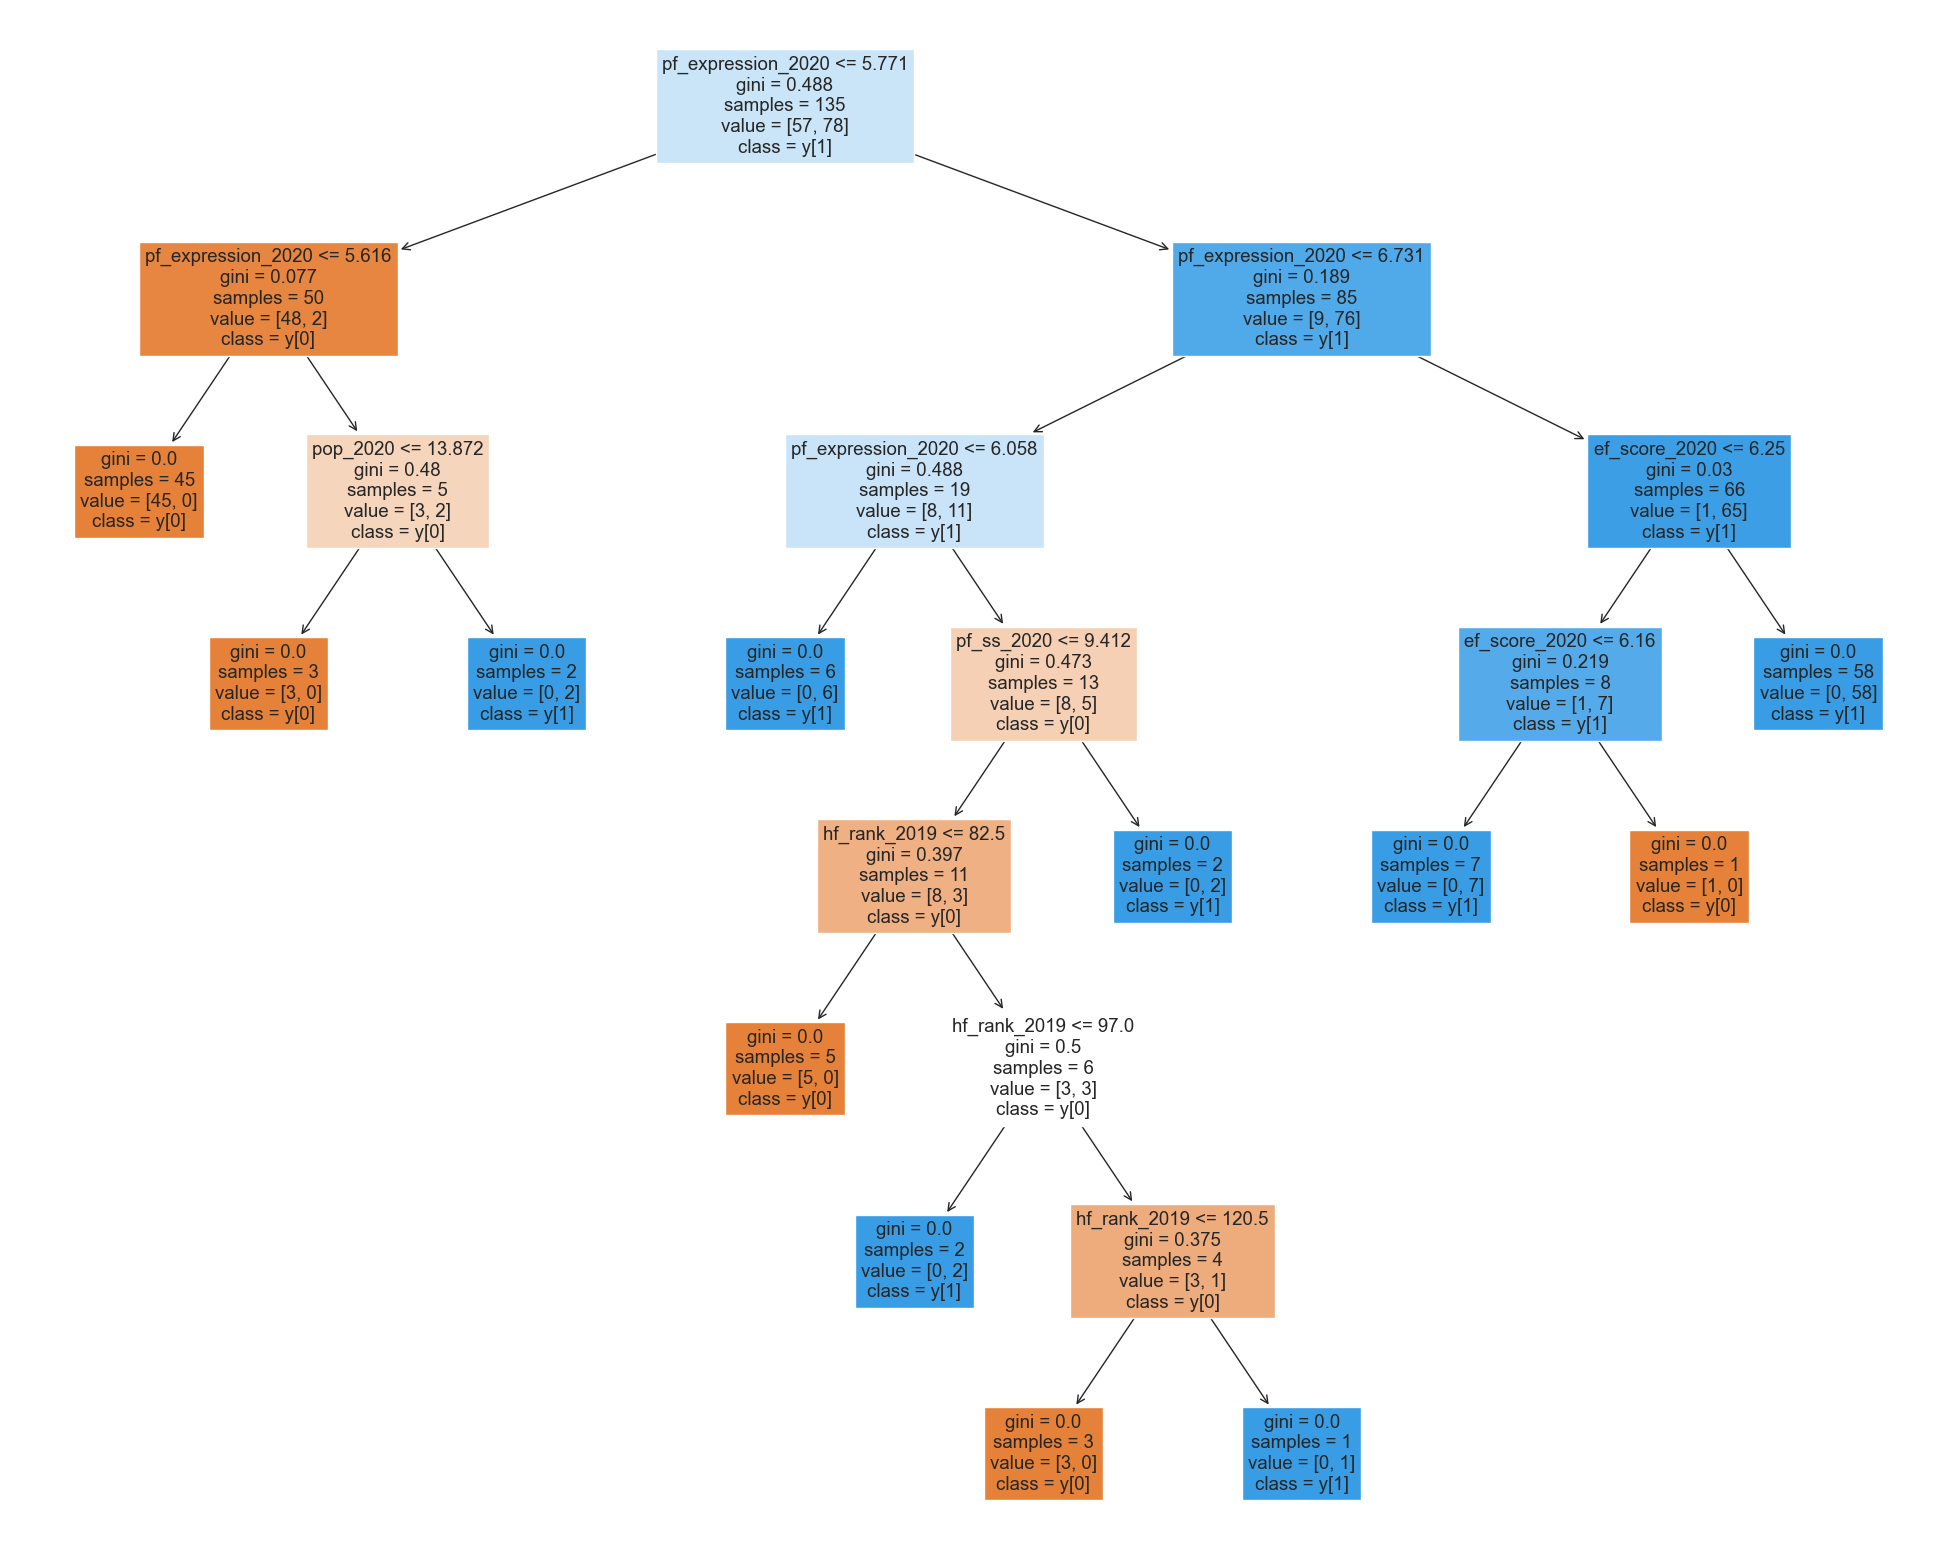

In [12]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree

def plot_tree(model,X,Y):
    fig = plt.figure(figsize=(25,20))
    tree.plot_tree(clf, 
                   feature_names=X.columns,  
                   class_names=True,
                   filled=True)
    
clf = DecisionTreeClassifier(random_state=123)
model = clf.fit(X, Y)
plot_tree(model, X, Y)

Hyper-parameter Tuning

In [13]:
# COMPLETE THE FOLLOWING CODE TO LOOP OVER POSSIBLE HYPER-PARAMETERS VALUES
test_results=[]
train_results=[]

for num_layer in range(1,20):
    model = tree.DecisionTreeClassifier(max_depth=num_layer)
    model = model.fit(x_train, y_train)

    yp_train=model.predict(x_train)
    yp_test=model.predict(x_test)

    # print(y_pred.shape)
    test_results.append([num_layer,accuracy_score(y_test, yp_test),recall_score(y_test, yp_test,pos_label=0),recall_score(y_test, yp_test,pos_label=1)])
    train_results.append([num_layer,accuracy_score(y_train, yp_train),recall_score(y_train, yp_train,pos_label=0),recall_score(y_train, yp_train,pos_label=1)])

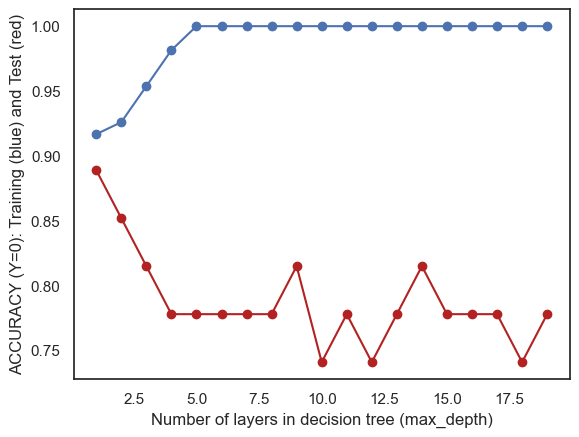

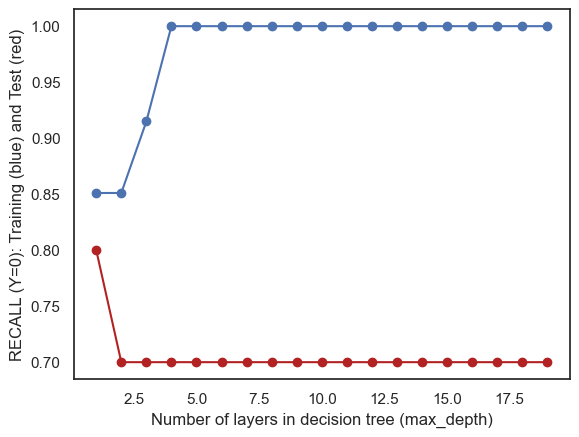

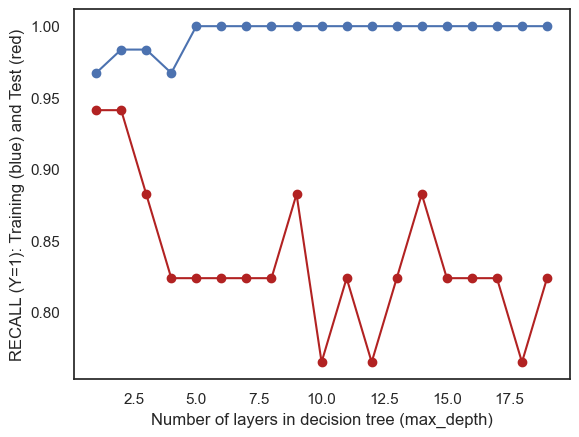

In [14]:
train_results = pd.DataFrame(train_results)
test_results = pd.DataFrame(test_results)

plt.plot(train_results[0], train_results[1], '-o')
plt.plot(test_results[0], test_results[1], '-o', color = 'firebrick')
plt.xlabel("Number of layers in decision tree (max_depth)")
plt.ylabel("ACCURACY (Y=0): Training (blue) and Test (red)")
plt.show()

plt.plot(train_results[0], train_results[2], '-o')
plt.plot(test_results[0], test_results[2], '-o', color = 'firebrick')
plt.xlabel("Number of layers in decision tree (max_depth)")
plt.ylabel("RECALL (Y=0): Training (blue) and Test (red)")
plt.show()

plt.plot(train_results[0], train_results[3], '-o')
plt.plot(test_results[0], test_results[3], '-o', color = 'firebrick')
plt.xlabel("Number of layers in decision tree (max_depth)")
plt.ylabel("RECALL (Y=1): Training (blue) and Test (red)")
plt.show()

Optimal Model

------TRAINING------
ACCURACY:  0.9166666666666666
NEGATIVE RECALL (Y=0):  0.9523809523809523
NEGATIVE PRECISION (Y=0):  0.9523809523809523
POSITIVE RECALL (Y=1):  0.8939393939393939
POSITIVE PRECISION (Y=1):  0.8939393939393939
[[40  7]
 [ 2 59]]


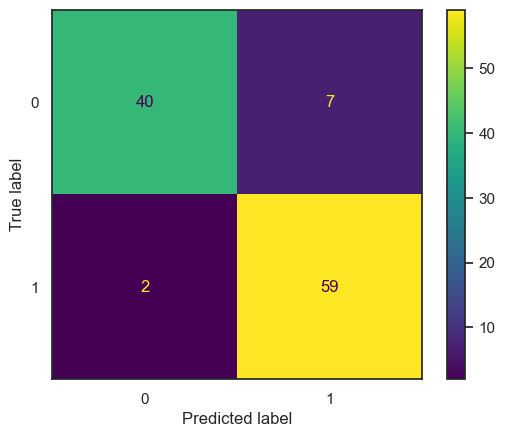

------TEST------
ACCURACY:  0.8888888888888888
NEGATIVE RECALL (Y=0):  0.8888888888888888
NEGATIVE PRECISION (Y=0):  0.8888888888888888
POSITIVE RECALL (Y=1):  0.8888888888888888
POSITIVE PRECISION (Y=1):  0.8888888888888888
[[ 8  2]
 [ 1 16]]


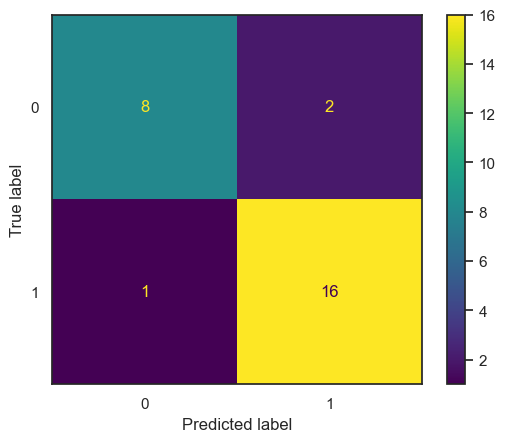

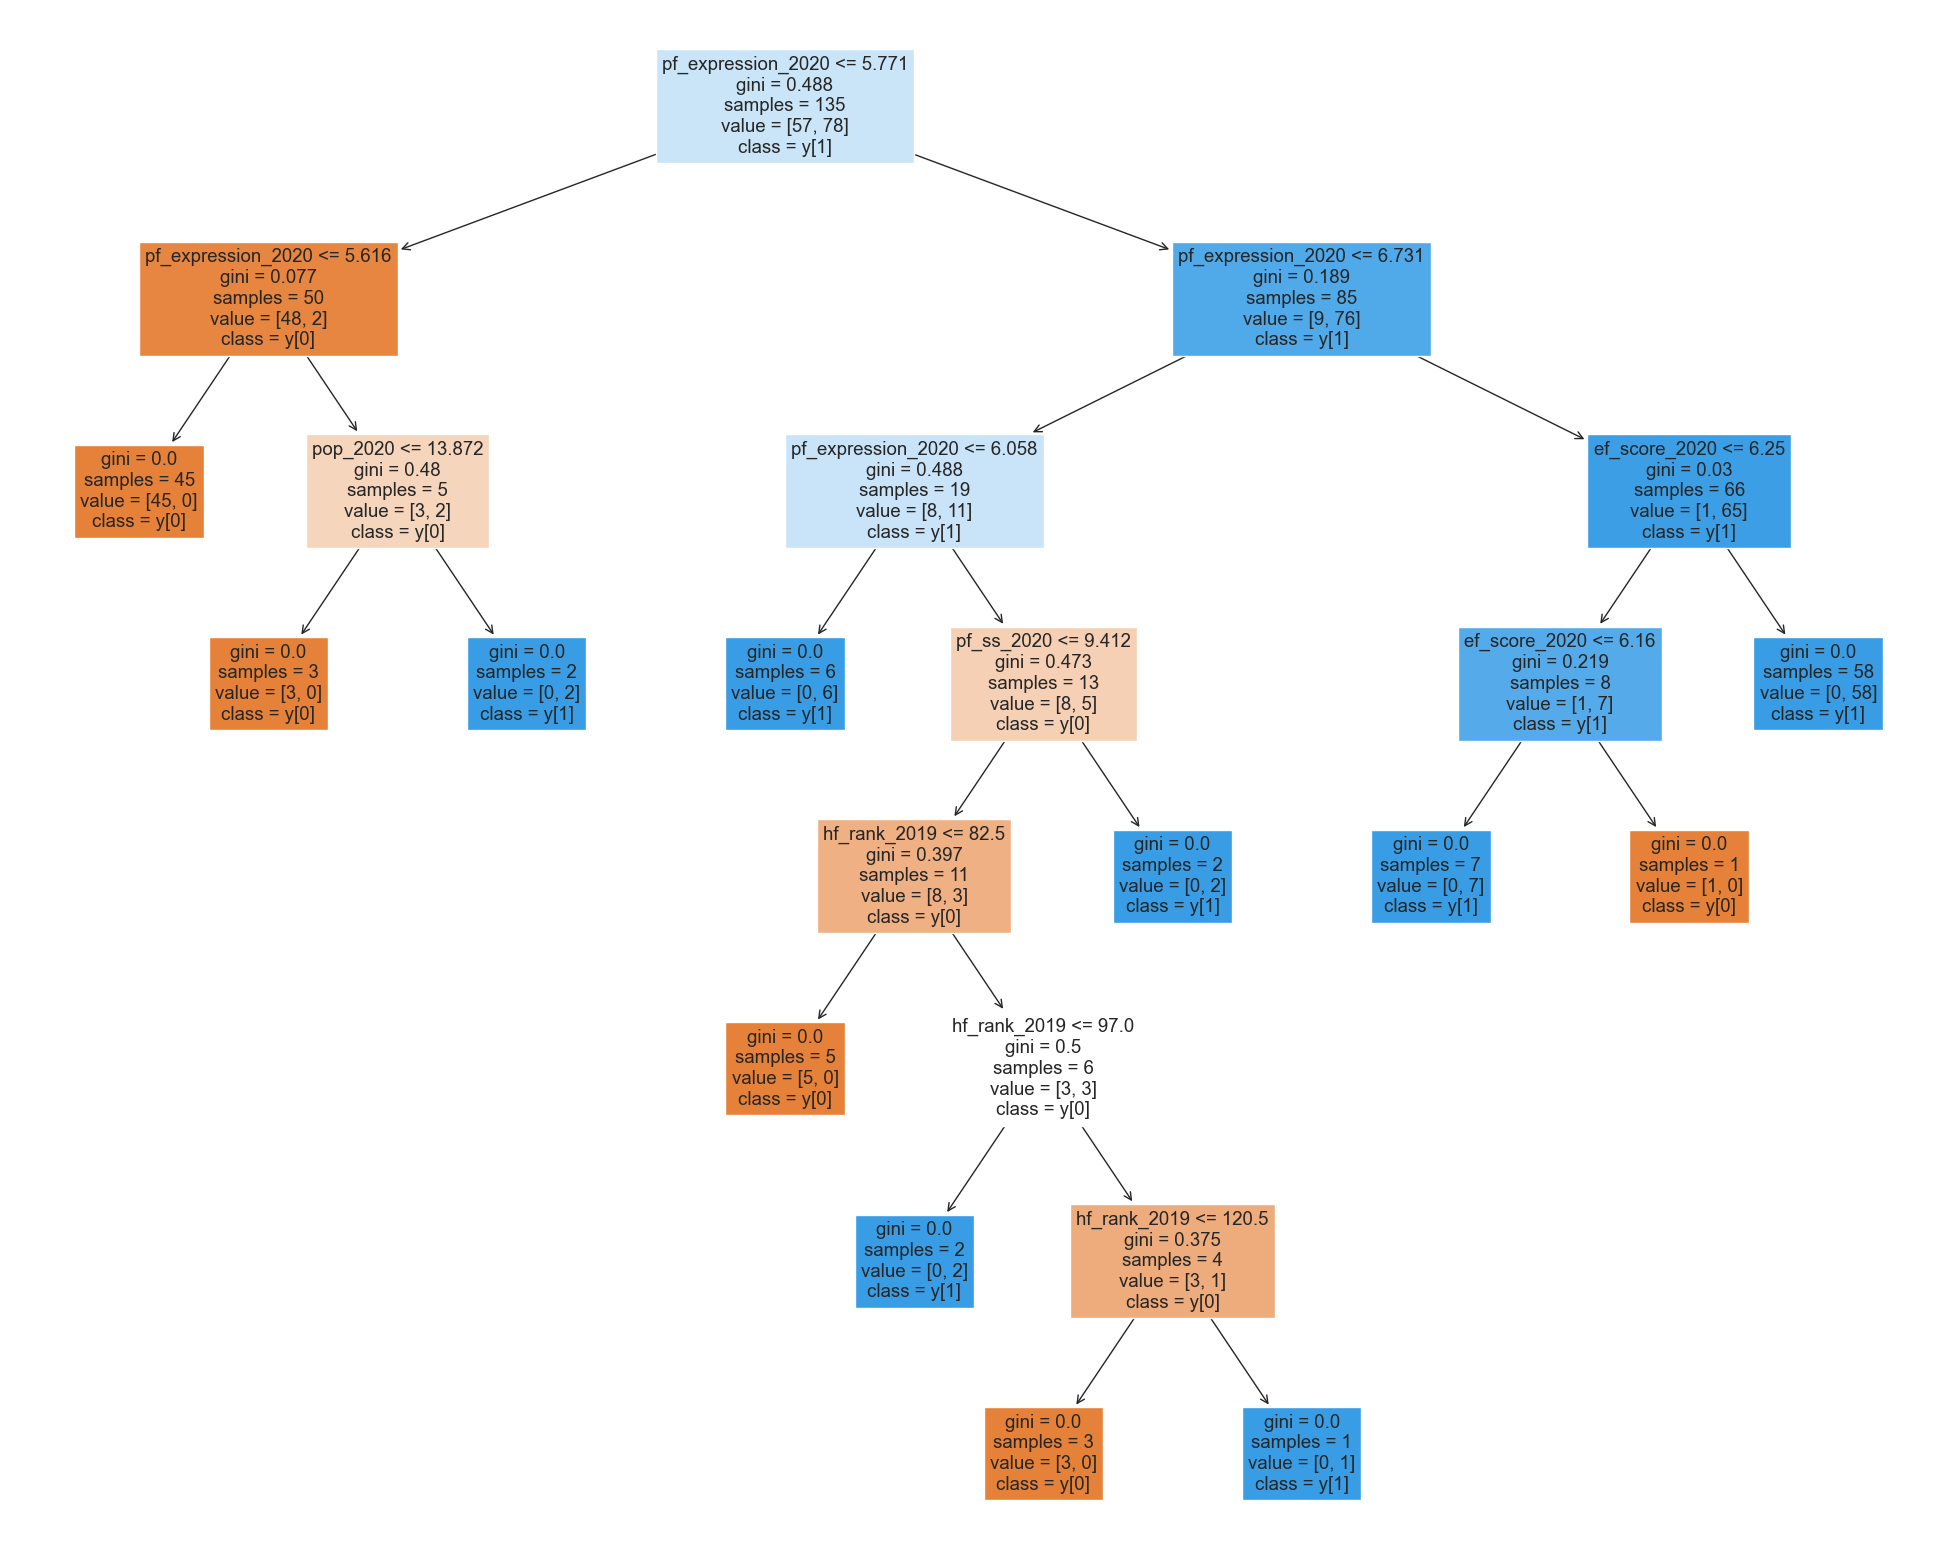

In [19]:

from sklearn import tree
model = tree.DecisionTreeClassifier(max_depth=1)
model = model.fit(x_train, y_train)

yp_train=model.predict(x_train)
yp_test=model.predict(x_test)

print("------TRAINING------")
confusion_plot(y_train,yp_train)
print("------TEST------")
confusion_plot(y_test,yp_test)

plot_tree(model,X,Y)

### Regression

Train / Test Split - Regression

In [20]:
X2 = df. loc[:, df.columns != 'hf_score_2020']
Y2 = df['hf_score_2020']

from sklearn.model_selection import train_test_split

x_train2, x_test2 = train_test_split(X2, test_size=0.2, random_state=123)
y_train2, y_test2 = train_test_split(Y2, test_size=0.2, random_state=123)

Model Fit and Evaluation

In [21]:
from sklearn.tree import DecisionTreeRegressor  
   
reg = DecisionTreeRegressor(random_state = 0)  
r1 = reg.fit(x_train2, y_train2) 
print('Coefficient of Determination: ', r1.score(x_test2, y_test2))


Coefficient of Determination:  0.9688828952123281


## Random Forests

### Classification

Model Fit and Evaluation

In [22]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

y_pred = rf.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8888888888888888


Hyper-parameter Tuning

In [40]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_dist = {'n_estimators': randint(50,500),
              'max_depth': randint(1,20)}

rf = RandomForestClassifier()
rand = RandomizedSearchCV(rf, 
                                 param_distributions = param_dist, 
                                 n_iter=5, 
                                 cv=5)

rand.fit(x_train, y_train)

best_rf = rand.best_estimator_

print(rand.best_params_)

{'max_depth': 2, 'n_estimators': 367}


Optimal Model

In [52]:
rf = RandomForestClassifier(max_depth = 2, n_estimators=432, oob_score=True)
rf.fit(x_train, y_train)
print(rf.oob_score_)

0.8888888888888888


### Regression

Model Fit and Evaluation

In [29]:
from sklearn.ensemble import RandomForestRegressor
rf2 = RandomForestRegressor(oob_score=True)
rf2.fit(x_train2, y_train2)

y_pred2 = rf2.predict(x_test2)

print('Score:', rf2.oob_score_)
print('Feature Importances: ', rf2.feature_importances_)

Score: 0.9722241835828088
Feature Importances:  [1.62528486e-03 1.24624014e-03 9.85428504e-01 2.47251120e-03
 2.61180479e-03 2.52674595e-03 2.30438618e-03 1.64046533e-03
 1.44057419e-04]


Hyperparameter Fine Tuning

In [35]:
rand = RandomizedSearchCV(rf2, 
                                 param_distributions = param_dist, 
                                 n_iter=5, 
                                 cv=5)

rand.fit(x_train, y_train)

best_rf = rand.best_estimator_

print(rand.best_params_)

{'max_depth': 8, 'n_estimators': 196}


Optimal Model

In [36]:
rf2 = RandomForestRegressor(max_depth = 8, n_estimators = 196, oob_score=True)
rf2.fit(x_train2, y_train2)

y_pred2 = rf2.predict(x_test2)

print('Score:', rf2.oob_score_)
print('Feature Importances: ', rf2.feature_importances_)

Score: 0.9714591199337785
Feature Importances:  [1.81119694e-03 1.16977272e-03 9.84058195e-01 2.29182451e-03
 3.36052639e-03 3.21098601e-03 2.23694368e-03 1.71764670e-03
 1.42908534e-04]


# Final Results

The decision tree for classification returned an initial accuracy of 85%. After hyperparameter fine tuning, the accuracy was 92%.
The decision tree for regression returned a coefficient of determination of 0.97.
The random forest for classification returned an initial OOB score of 0.88. After fine tuning using a Randomized Search CV, the model accuracy was the same indicating that the initial run was the optimal model.
The random forest for regression retruned an initial OOB Score of 0.97. After fine tuning using a Randomized Search CV, the model accuracy was the same indicating that the initial run was the optimal model.
Additional data could improve model performance for both models.

# Conclusions

This analysis developed predictive models for political regime and human freedom score using decision trees and random forests. First, the classifier algorithms for political regime will be discussed. This analysis involved a binary classification of autocracy (y=0) and democracy(y=1). Initially, a baseline classifier was generated. This classifier was based upon the actual class distribution in which 42% of nations were autocratic and 58% of nations were democratic. This model returned an accuracy of 0.5, meaning that the random classifier predicts class accurately 50% of the time. This model will be used to compare and evalulate the random forests and decision trees. Next, a decision tree was generated and fine tuned. The final accuracy of this model was 0.92, which is higher than the random classifier. Thus, 92% of the time, the decision tree can appropriately identify political regime of a nation based on their economic, social, political, and freedom indicators. A random forest was then used to model the same relationship. The random forest had an accuracy of 0.88 which was higher than the baseline model for classification. So, 92% of the time, the random forest can appropriately identify political regime of a nation based on their economic, social, political, and freedom indicators. This was less accurate than the decision tree, although the model may be more robust as it is insensitive to overfitting.

Next, the regression algorithms for human freedom score will be evaluated. A decision tree was implemented to build the regression model for the country-wise dataset. The coefficient of determination from this regression model was 0.97, which indicates that the model is consistent in predicting relative to the observed outcomes for human freedom score. A random forest was then used to model the same relationship. The accuracy of the random forest was 0.97. This number indicates high performance of the random forest in predicting human freedom score based on the economic, social, and political, indicators. Both regression models had high performance for this outcome.

These models effectively developed a rule based system to predict political regime and human freedom based on the indicators in the dataset. This can be used to predict future freedom or changes in regime in accordance with geopolitical change. For example, we can model how the freedom of some country will change given their GDP increases by some amount using the classification model. Or, we can predict future changes in regime if the population changes significantly using the regression model. These models could be used by policy makers, researchers, or military professionals to understand the complex and everchagning geopolitical dynamics of our world.